In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


### Prepare data

In [ ]:
import kagglehub
import random
import os

path = kagglehub.dataset_download("samuelcortinhas/muffin-vs-chihuahua-image-classification")
data_dir = 'data'

!mv {path} {data_dir}

!mkdir {data_dir}/combined
!mkdir {data_dir}/combined/chihuahua
!mkdir {data_dir}/combined/muffin

!mv {data_dir}/test/chihuahua/* {data_dir}/combined/chihuahua
!mv {data_dir}/test/muffin/* {data_dir}/combined/muffin
!mv {data_dir}/train/chihuahua/* {data_dir}/combined/chihuahua
!mv {data_dir}/train/muffin/* {data_dir}/combined/muffin

!rmdir {data_dir}/test/chihuahua
!rmdir {data_dir}/test/muffin
!rmdir {data_dir}/train/chihuahua
!rmdir {data_dir}/train/muffin
!rmdir {data_dir}/train
!rmdir {data_dir}/test

def limit_files(directory, max_files):
    files = os.listdir(directory)
    if len(files) > max_files:
        files_to_remove = random.sample(files, len(files) - max_files)
        for file in files_to_remove:
            os.remove(os.path.join(directory, file))

limit_files(f"{data_dir}/combined/chihuahua", 500)
limit_files(f"{data_dir}/combined/muffin", 500)

100%|██████████| 474M/474M [00:09<00:00, 53.8MB/s]

Extracting files...


### LeNet-5 architecture

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Reference: https://www.geeksforgeeks.org/convolutional-neural-network-cnn-architectures/
class LeNet5(nn.Module):
    def __init__(self, in_shape, num_classes):
        super().__init__()
        self.num_classes = num_classes

        self.conv1 = nn.Conv2d(in_channels=in_shape, out_channels=6, kernel_size=5, stride=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

### AlexNNet architecture

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Reference: https://www.geeksforgeeks.org/convolutional-neural-network-cnn-architectures/
class AlexNet(nn.Module):
    def __init__(self, in_shape, num_classes):
        super().__init__()
        self.num_classes = num_classes

        self.conv1 = nn.Conv2d(in_channels=in_shape, out_channels=96, kernel_size=11, stride=4, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(in_features=256 * 6 * 6, out_features=4096)
        self.fc2 = nn.Linear(in_features=4096, out_features=4096)
        self.fc3 = nn.Linear(in_features=4096, out_features=num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(F.relu(self.conv5(x)))
        x = x.view(-1, 256 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, 0.5)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

### Simple CNN architecture

In [ ]:
import torch
import torch.nn as  nn
import torch.nn.functional as F

# Reference: https://medium.com/@chenycy/a-simple-convolutional-neural-network-cnn-classifier-based-on-real-images-084110d52c18

class CustomCNN(nn.Module):
    def __init__(self, in_shape, num_classes):
        super().__init__()
        self.num_classes = num_classes

        self.conv1 = nn.Conv2d(in_channels=in_shape, out_channels=16, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.flatten = nn.Flatten()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=(64 * 17 * 17), out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

#### SimpleCNN with dropout

In [ ]:
import torch
import torch.nn as  nn
import torch.nn.functional as F

class CustomCNN_withDropout(nn.Module):
    def __init__(self, in_shape, num_classes):
        super().__init__()
        self.num_classes = num_classes

        self.conv1 = nn.Conv2d(in_channels=in_shape, out_channels=16, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.flatten = nn.Flatten()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=(64 * 17 * 17), out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=num_classes)
        self.dropout = nn.Dropout(p=0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.flatten(x)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)

        return x

#### SimpleCNN with batch normalization

In [ ]:
import torch
import torch.nn as  nn
import torch.nn.functional as F

class CustomCNN_withNorm(nn.Module):
    def __init__(self, in_shape, num_classes):
        super().__init__()
        self.num_classes = num_classes

        self.conv1 = nn.Conv2d(in_channels=in_shape, out_channels=16, kernel_size=3, stride=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.flatten = nn.Flatten()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=(64 * 17 * 17), out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

#### SimpleCNN with normalization and tanh

In [ ]:
import torch
import torch.nn as  nn
import torch.nn.functional as F

class CustomCNN_withNormTanh(nn.Module):
    def __init__(self, in_shape, num_classes):
        super().__init__()
        self.num_classes = num_classes

        self.conv1 = nn.Conv2d(in_channels=in_shape, out_channels=16, kernel_size=3, stride=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.flatten = nn.Flatten()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=(64 * 17 * 17), out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=num_classes)

    def forward(self, x):
        x = self.pool(F.tanh(self.bn1(self.conv1(x))))
        x = self.pool(F.tanh(self.bn2(self.conv2(x))))
        x = self.pool(F.tanh(self.bn3(self.conv3(x))))
        x = self.flatten(x)
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)

        return x

### Training

In [ ]:
import numpy as np

def train_epoch(optimizer, loss_func, model, loader):
    classes = model.num_classes
    model.train()
    loss_acum = np.array([], dtype = np.float32)

    for images, labels in loader:
      optimizer.zero_grad()
      images = images.to(device)
      labels = torch.nn.functional.one_hot(labels, classes).float().to(device)

      pred = model(images)
      loss = loss_func(pred, labels)
      loss_acum = np.append(loss_acum, loss.cpu().detach().numpy())

      loss.backward()
      optimizer.step()

    return np.mean(loss_acum)

### Evaluation

In [ ]:
def evaluate(model, loader):
  model.eval()

  correct_predictions = 0
  total_predictions = 0

  labels_acum = []
  predictions_acum = []

  for images, labels in loader:
    images = images.to(device)
    labels = labels.to(device)

    with torch.no_grad():
      pred = torch.sigmoid(model(images))

    label_pred = torch.argmax(pred, axis = 1)

    labels_acum = np.append(labels_acum, labels.cpu().detach().numpy())
    predictions_acum = np.append(predictions_acum, label_pred.cpu().detach().numpy())

    correct_predictions += torch.sum(labels == label_pred)
    total_predictions += images.shape[0]

  accuracy = correct_predictions / total_predictions

  return accuracy, labels_acum, predictions_acum

### Training sequence

In [ ]:
from datetime import datetime, timedelta

def train_and_eval(model, loader_train, loader_valid, epoch_count, lr):
  loss_func = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr = lr)
  #optimizer = torch.optim.SGD(model.parameters(), lr = lr)

  start_time = datetime.now()

  train_accuracy_acum = []
  test_accuracy_acum = []
  for epoch in range(epoch_count):
    loss = train_epoch(optimizer, loss_func, model, loader_train)

    train_accuracy, _, _ = evaluate(model, loader_train)
    train_accuracy_acum.append(train_accuracy.cpu().numpy())
    test_accuracy, _, _ = evaluate(model, loader_valid)
    test_accuracy_acum.append(test_accuracy.cpu().numpy())

    elapsed = timedelta(seconds=((datetime.now() - start_time).total_seconds()))
    print(f'Epoch: {epoch}, Time: {elapsed}, Training loss: {loss}')
    print(f'Training accuracy: {torch.round(train_accuracy * 100)}, Validation accuracy: {torch.round(test_accuracy * 100)}')

    if (torch.round(test_accuracy * 100) >= 90):
      break

  _, labels, predictions = evaluate(model, loader_valid)

  return train_accuracy_acum, test_accuracy_acum, labels, predictions

### Metrics

In [ ]:
from sklearn.metrics import confusion_matrix

def compute_metrics(labels, predictions):
  metrics = {}

  matrix = confusion_matrix(labels, predictions)

  metrics['conf_matrix'] = matrix

  metrics['accuracy'] = np.trace(matrix) / np.sum(matrix)

  return metrics

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(train_accuracy, valid_accuracy, title):
  plt.clf()
  plt.plot(train_accuracy, 'b', label = 'Training accuracy')
  plt.plot(valid_accuracy, 'r', label = 'Validation accuracy')
  plt.title(title)
  plt.ylim(0.0, 1.0)
  plt.legend()
  plt.show()

### T&E LeNet5

Epoch: 0, Time: 0:00:18.355999, Training loss: 0.6824316382408142
Training accuracy: 69.0, Validation accuracy: 63.0
Epoch: 1, Time: 0:00:34.108084, Training loss: 0.6100952625274658
Training accuracy: 73.0, Validation accuracy: 70.0
Epoch: 2, Time: 0:00:49.486963, Training loss: 0.5212736129760742
Training accuracy: 76.0, Validation accuracy: 80.0
Epoch: 3, Time: 0:01:05.983629, Training loss: 0.494446337223053
Training accuracy: 77.0, Validation accuracy: 81.0
Epoch: 4, Time: 0:01:22.338542, Training loss: 0.4831426739692688
Training accuracy: 78.0, Validation accuracy: 79.0
Epoch: 5, Time: 0:01:37.856098, Training loss: 0.47173261642456055
Training accuracy: 77.0, Validation accuracy: 81.0
Epoch: 6, Time: 0:01:53.342347, Training loss: 0.4699011445045471
Training accuracy: 80.0, Validation accuracy: 81.0
Epoch: 7, Time: 0:02:08.852694, Training loss: 0.43971550464630127
Training accuracy: 79.0, Validation accuracy: 80.0
Epoch: 8, Time: 0:02:25.368782, Training loss: 0.43999651074409

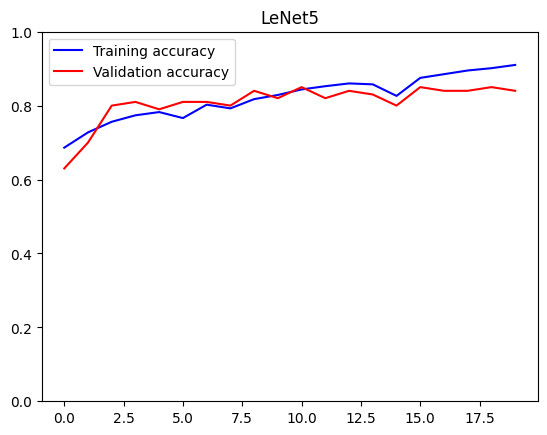

In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
import math

transformations = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder(data_dir + '/combined', transform=transformations)

dataset_length = len(dataset)
val_length = math.floor(dataset_length * 0.1)
test_length = math.floor(dataset_length * 0.1)
train_length = dataset_length - val_length - test_length

train_set_le, val_set_le, test_set_le = torch.utils.data.random_split(dataset, [train_length, val_length, test_length])

train_loader_le = DataLoader(train_set_le, batch_size = 100, shuffle=True)
val_loader_le = DataLoader(val_set_le, shuffle=False)
test_loader_le = DataLoader(test_set_le, shuffle=False)

model_le = LeNet5(3, 2).to(device)

train_acc, valid_acc, labels, predictions = train_and_eval(model_le, train_loader_le, val_loader_le, 20, 0.001)
print(compute_metrics(labels, predictions))
plot_accuracy(train_acc, valid_acc, "LeNet5")

### T&E AlexNet

Epoch: 0, Time: 0:00:21.036564, Training loss: 1.1441125869750977
Training accuracy: 51.0, Validation accuracy: 49.0
Epoch: 1, Time: 0:00:42.424144, Training loss: 0.754645824432373
Training accuracy: 51.0, Validation accuracy: 49.0
Epoch: 2, Time: 0:01:02.768400, Training loss: 0.6922944784164429
Training accuracy: 51.0, Validation accuracy: 49.0
Epoch: 3, Time: 0:01:23.692579, Training loss: 0.6890884637832642
Training accuracy: 49.0, Validation accuracy: 51.0
Epoch: 4, Time: 0:01:44.404380, Training loss: 0.6938549876213074
Training accuracy: 49.0, Validation accuracy: 51.0
Epoch: 5, Time: 0:02:04.433983, Training loss: 0.6934490203857422
Training accuracy: 49.0, Validation accuracy: 51.0
Epoch: 6, Time: 0:02:25.581741, Training loss: 0.6933596134185791
Training accuracy: 50.0, Validation accuracy: 52.0
Epoch: 7, Time: 0:02:46.190174, Training loss: 0.6866846680641174
Training accuracy: 54.0, Validation accuracy: 55.0
Epoch: 8, Time: 0:03:06.602390, Training loss: 0.681800901889801


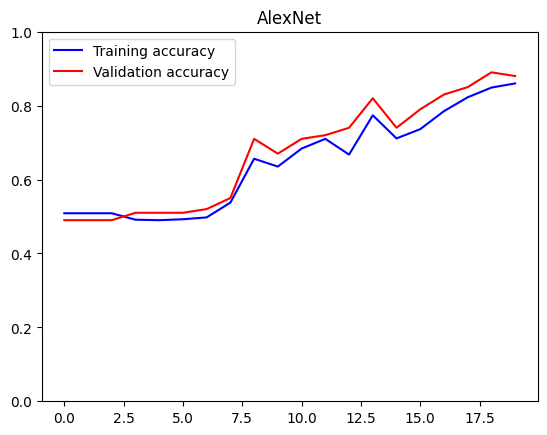

In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
import math

transformations = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder(data_dir + '/combined', transform=transformations)

dataset_length = len(dataset)
val_length = math.floor(dataset_length * 0.1)
test_length = math.floor(dataset_length * 0.1)
train_length = dataset_length - val_length - test_length

train_set_alex, val_set_alex, test_set_alex = torch.utils.data.random_split(dataset, [train_length, val_length, test_length])

train_loader_alex = DataLoader(train_set_alex, batch_size = 100, shuffle=True)
val_loader_alex = DataLoader(val_set_alex, shuffle=False)
test_loader_alex = DataLoader(test_set_alex, shuffle=False)

model_alex = AlexNet(3, 2).to(device)

train_acc, valid_acc, labels, predictions = train_and_eval(model_alex, train_loader_alex, val_loader_alex, 20, 0.001)
print(compute_metrics(labels, predictions))
plot_accuracy(train_acc, valid_acc, "AlexNet")

### T&E CustomCNN

Epoch: 0, Time: 0:00:17.319345, Training loss: 0.8371007442474365
Training accuracy: 64.0, Validation accuracy: 70.0
Epoch: 1, Time: 0:00:35.530299, Training loss: 0.6533783674240112
Training accuracy: 66.0, Validation accuracy: 71.0
Epoch: 2, Time: 0:00:53.617249, Training loss: 0.5737598538398743
Training accuracy: 78.0, Validation accuracy: 76.0
Epoch: 3, Time: 0:01:10.648748, Training loss: 0.4797555208206177
Training accuracy: 80.0, Validation accuracy: 75.0
Epoch: 4, Time: 0:01:28.694290, Training loss: 0.43133658170700073
Training accuracy: 80.0, Validation accuracy: 74.0
Epoch: 5, Time: 0:01:45.720043, Training loss: 0.3777915835380554
Training accuracy: 88.0, Validation accuracy: 79.0
Epoch: 6, Time: 0:02:02.732692, Training loss: 0.3456099331378937
Training accuracy: 84.0, Validation accuracy: 83.0
Epoch: 7, Time: 0:02:20.615229, Training loss: 0.2867124676704407
Training accuracy: 91.0, Validation accuracy: 82.0
Epoch: 8, Time: 0:02:37.623208, Training loss: 0.27258723974227

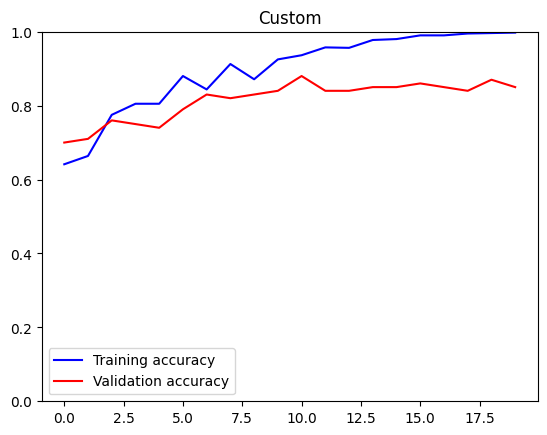

In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
import math

transformations = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder(data_dir + '/combined', transform=transformations)

dataset_length = len(dataset)
val_length = math.floor(dataset_length * 0.1)
test_length = math.floor(dataset_length * 0.1)
train_length = dataset_length - val_length - test_length

train_set_cus, val_set_cus, test_set_cus = torch.utils.data.random_split(dataset, [train_length, val_length, test_length])

train_loader_cus = DataLoader(train_set_cus, batch_size = 100, shuffle=True)
val_loader_cus = DataLoader(val_set_cus, shuffle=False)
test_loader_cus = DataLoader(test_set_cus, shuffle=False)

model_cus = CustomCNN(3, 2).to(device)

train_acc, valid_acc, labels, predictions = train_and_eval(model_cus, train_loader_cus, val_loader_cus, 20, 0.001)
print(compute_metrics(labels, predictions))
plot_accuracy(train_acc, valid_acc, "Custom")

### T&E CustomCNN_Dropout

In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
import math

transformations = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder(data_dir + '/combined', transform=transformations)

dataset_length = len(dataset)
val_length = math.floor(dataset_length * 0.1)
test_length = math.floor(dataset_length * 0.1)
train_length = dataset_length - val_length - test_length

train_set_cusdrop, val_set_cusdrop, test_set_cusdrop = torch.utils.data.random_split(dataset, [train_length, val_length, test_length])

train_loader_cusdrop = DataLoader(train_set_cusdrop, batch_size = 100, shuffle=True)
val_loader_cusdrop = DataLoader(val_set_cusdrop, shuffle=False)
test_loader_cusdrop = DataLoader(test_set_cusdrop, shuffle=False)

model_cusdrop = CustomCNN_withDropout(3, 2).to(device)

train_acc, valid_acc, labels, predictions = train_and_eval(model_cusdrop, train_loader_cusdrop, val_loader_cusdrop, 20, 0.001)
print(compute_metrics(labels, predictions))
plot_accuracy(train_acc, valid_acc, "Custom with dropout (25%)")

### T&E CustomCNN with batch normalization

Epoch: 0, Time: 0:00:20.403576, Training loss: 1.388150691986084
Training accuracy: 72.0, Validation accuracy: 77.0
Epoch: 1, Time: 0:00:36.525416, Training loss: 0.512059211730957
Training accuracy: 76.0, Validation accuracy: 76.0
Epoch: 2, Time: 0:00:52.607371, Training loss: 0.4407365620136261
Training accuracy: 84.0, Validation accuracy: 85.0
Epoch: 3, Time: 0:01:09.682995, Training loss: 0.3738515377044678
Training accuracy: 85.0, Validation accuracy: 86.0
Epoch: 4, Time: 0:01:25.860050, Training loss: 0.31900203227996826
Training accuracy: 88.0, Validation accuracy: 87.0
Epoch: 5, Time: 0:01:42.959737, Training loss: 0.28349214792251587
Training accuracy: 90.0, Validation accuracy: 89.0
Epoch: 6, Time: 0:02:00.542429, Training loss: 0.250496506690979
Training accuracy: 91.0, Validation accuracy: 89.0
Epoch: 7, Time: 0:02:16.610178, Training loss: 0.20591270923614502
Training accuracy: 93.0, Validation accuracy: 89.0
Epoch: 8, Time: 0:02:32.842742, Training loss: 0.181142598390579

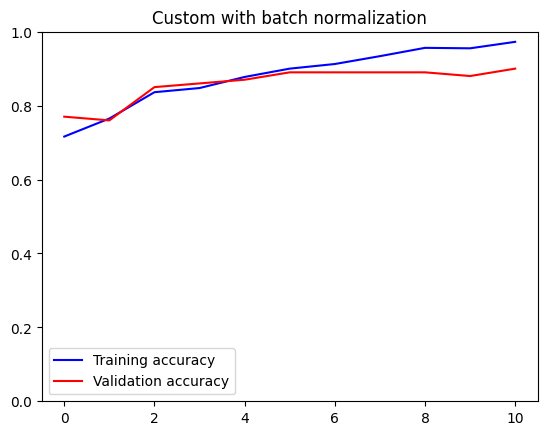

In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
import math

transformations = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder(data_dir + '/combined', transform=transformations)

dataset_length = len(dataset)
val_length = math.floor(dataset_length * 0.1)
test_length = math.floor(dataset_length * 0.1)
train_length = dataset_length - val_length - test_length

train_set_cusnorm, val_set_cusnorm, test_set_cusnorm = torch.utils.data.random_split(dataset, [train_length, val_length, test_length])

train_loader_cusnorm = DataLoader(train_set_cusnorm, batch_size = 100, shuffle=True)
val_loader_cusnorm = DataLoader(val_set_cusnorm, shuffle=False)
test_loader_cusnorm = DataLoader(test_set_cusnorm, shuffle=False)

model_cusnorm = CustomCNN_withNorm(3, 2).to(device)

train_acc, valid_acc, labels, predictions = train_and_eval(model_cusnorm, train_loader_cusnorm, val_loader_cusnorm, 20, 0.001)
print(compute_metrics(labels, predictions))
plot_accuracy(train_acc, valid_acc, "Custom with batch normalization")

### T&E CustomCNN with normalization and tanh

Epoch: 0, Time: 0:00:17.620969, Training loss: 1.2709438800811768
Training accuracy: 78.0, Validation accuracy: 74.0
Epoch: 1, Time: 0:00:35.881706, Training loss: 0.48634791374206543
Training accuracy: 81.0, Validation accuracy: 82.0
Epoch: 2, Time: 0:00:53.695691, Training loss: 0.40143704414367676
Training accuracy: 83.0, Validation accuracy: 79.0
Epoch: 3, Time: 0:01:13.642148, Training loss: 0.3248874545097351
Training accuracy: 88.0, Validation accuracy: 81.0
Epoch: 4, Time: 0:01:31.277723, Training loss: 0.27333205938339233
Training accuracy: 87.0, Validation accuracy: 79.0
Epoch: 5, Time: 0:01:48.666910, Training loss: 0.24636958539485931
Training accuracy: 92.0, Validation accuracy: 82.0
Epoch: 6, Time: 0:02:07.233281, Training loss: 0.20369109511375427
Training accuracy: 93.0, Validation accuracy: 83.0
Epoch: 7, Time: 0:02:24.725724, Training loss: 0.16965003311634064
Training accuracy: 96.0, Validation accuracy: 78.0
Epoch: 8, Time: 0:02:43.170730, Training loss: 0.144780129

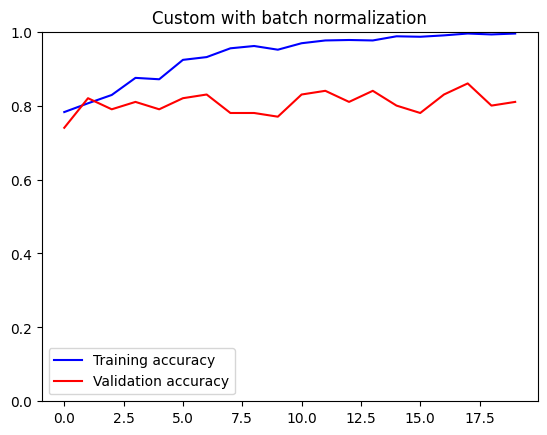

In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
import math

transformations = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder(data_dir + '/combined', transform=transformations)

dataset_length = len(dataset)
val_length = math.floor(dataset_length * 0.1)
test_length = math.floor(dataset_length * 0.1)
train_length = dataset_length - val_length - test_length

train_set_cusnormtanh, val_set_cusnormtanh, test_set_cusnormtanh = torch.utils.data.random_split(dataset, [train_length, val_length, test_length])

train_loader_cusnormtanh = DataLoader(train_set_cusnormtanh, batch_size = 100, shuffle=True)
val_loader_cusnormtanh = DataLoader(val_set_cusnormtanh, shuffle=False)
test_loader_cusnormtanh = DataLoader(test_set_cusnormtanh, shuffle=False)

model_cusnormtanh = CustomCNN_withNormTanh(3, 2).to(device)

train_acc, valid_acc, labels, predictions = train_and_eval(model_cusnormtanh, train_loader_cusnormtanh, val_loader_cusnormtanh, 20, 0.001)
print(compute_metrics(labels, predictions))
plot_accuracy(train_acc, valid_acc, "Custom with batch normalization and tanh")

### Check model with test data

[1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0.]


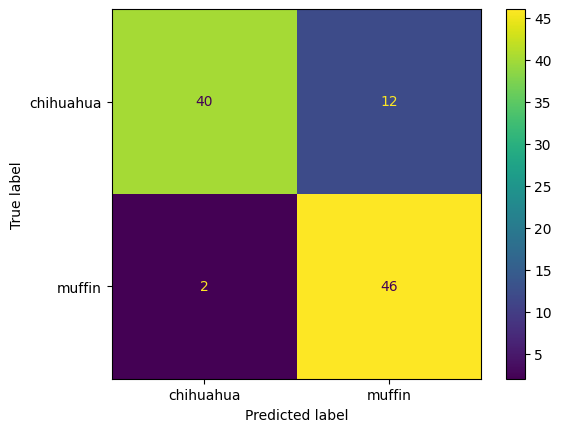

In [ ]:
from sklearn import metrics

test_accuracy, labels, predictions = evaluate(model_cusnormtanh, test_loader_cusnormtanh)
metrics_calc = compute_metrics(labels, predictions)
print(labels)
print(predictions)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics_calc['conf_matrix'], display_labels = test_set_cusnorm.dataset.classes)
cm.plot()
plt.show()